# Calculo multidimensional Parte 4




## Hessian:
El Hessian es la matriz de segundas derivadas parciales. Donde entra esto?

* Para determinar si un punto es de silla, maxima o minima (esta clase)
* Para extender las series de Taylor multidimensionales a alto orden.
Los terminos de la serie de Taylor son


$$f(x) = f(x_0) + f'(x_0)(x-x_0) + \frac12 f''(x_0) (x-x_0)^2 + \frac{1}{3!} f'''(x) (x - x_0)^3 + \cdots \frac{1}{n!} f^{(n)} (x - x_0) + $$

ahora $x,x_0 \in \mathbb{R}^n$
$$f(x) = f(x_0) + \nabla_{x_i} (f(x_0)) \cdot  
+ \frac12 (x - x_0)^T H_{ij} (x -x_0) + \cdots .$$

Donde
$H_{ij} =  \frac{\partial^2 f}{\partial x_i \partial x_j}$

In [ ]:
from sympy import hessian, symbols, ordered
import sympy as sp
x,y,z = symbols('x y z ')
f = x*sp.sin(y)*z**2
v = list(ordered(f.free_symbols))
print("simbolos extraidos de la function", v)
hessian(f,v)

simbolos extraidos de la function [x, y, z]


Matrix([
[          0,    z**2*cos(y),   2*z*sin(y)],
[z**2*cos(y), -x*z**2*sin(y), 2*x*z*cos(y)],
[ 2*z*sin(y),   2*x*z*cos(y),   2*x*sin(y)]])

In [ ]:
## Reglas de la cadenas
from sympy import Function
x,y,z = symbols('x y z ', cls=Function)
f = symbols('f', cls=Function)
t = symbols('t')

# curva
x = x(t)
y = y(t)
z = z(t)


# f a lo largo de la curva
f = f(x,y,z)
f



f(x(t), y(t), z(t))

In [ ]:
from sympy import diff
# derivada total de df/dt
diff(f,t)

Derivative(f(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(f(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(f(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

In [ ]:
# regla de la cadena para derivadas parciales.
# definimos funciones  parametricas de dos parametros (superficies)
x,y,z = symbols('x y z ', cls=Function)
s,t=symbols('s,t')
f = symbols('f', cls=Function)

# superficiei
x=x(s,t)
y=y(s,t)
z=z(s,t)
f=f(x,y,z)
f


f(x(s, t), y(s, t), z(s, t))

In [ ]:
diffs=diff(f,s)
diffs

Derivative(f(x(s, t), y(s, t), z(s, t)), x(s, t))*Derivative(x(s, t), s) + Derivative(f(x(s, t), y(s, t), z(s, t)), y(s, t))*Derivative(y(s, t), s) + Derivative(f(x(s, t), y(s, t), z(s, t)), z(s, t))*Derivative(z(s, t), s)

In [ ]:
# evaluamos
fst = diffs.subs(f, x**2*y)
fst

Derivative(x(s, t)**2*y(s, t), x(s, t))*Derivative(x(s, t), s) + Derivative(x(s, t)**2*y(s, t), y(s, t))*Derivative(y(s, t), s) + Derivative(x(s, t)**2*y(s, t), z(s, t))*Derivative(z(s, t), s)

In [ ]:
fst2 = fst.doit()
fst2

x(s, t)**2*Derivative(y(s, t), s) + 2*x(s, t)*y(s, t)*Derivative(x(s, t), s)

In [ ]:
# reemplacemos las variables
fst2.subs ( {x:s**2+t, y:s**2-t})

2*(s**2 - t)*(s**2 + t)*Derivative(s**2 + t, s) + (s**2 + t)**2*Derivative(s**2 - t, s)

In [ ]:
# doit
dfds = fst2.subs( {x: s**2 + t, y : s**2 -t}).doit()
dfds

4*s*(s**2 - t)*(s**2 + t) + 2*s*(s**2 + t)**2

In [ ]:
# llevar a numerico
dfds.subs ( {s:5, t:2})

19710

## Valores extremos de functions.
Por facilidad usamos funcion de dos variables $f=f(x,y)$.
Los puntos **criticos** ocurren

* cuando la derivada (gradiente) es 0, $ \nabla f = 0$.
* En el borde de la funcion.

Los puntos criticos son:

* maximos
* minimos
* puntos de silla
* otros (no definidos)


Para poder determinar si un punto critico es maximo, minimo, etc.
debemos usar un criterio que se basa en la matriz Hessiana.


$$H = \begin{pmatrix}  f_{xx} & f_{xy}  \\ f_{yx} & f_{yy}\end{pmatrix} .$$
En general (matematicos encuentran excepciones) $f_{xy}=f_{yx}$.


Aca $f_{xy} = \partial^2 f/\partial x \partial y $, y similarmente con las demas.
El discriminante $D$ de la funcion $f$ se calcula como el determinante de la matriz Hessiana.


### Teorema criterio de max/min/saddle/etc
$$D(f) = \det H  = f_{xx} f_{yy} - f_{xy} f_{yx} .$$
asumamos $f_{xy} = f_{yx}$ y un punto $(a,b)$ entonces
el punto es de

* **maximo local** : Si $f_{xx} < 0 $ y $D > 0$.
* **minimo local** : Si $f_{xx} > 0 $ y $D > 0$.
* **punto de silla** : Si $D < 0$.
* **inconcluso** : Si $D = 0$.

Encontre un ejemplo interesante para ilustrar todo esto

$$ f(x,y) = \sin x \sin y. $$






In [ ]:
from sympy import Interval, solve, solveset, S, pi
x = symbols('x', domain=Interval(0, (3/2)*pi)) # esto es nuevo, restringir la variable a un intervalo
y = symbols('y', domain=Interval(0, (3/2)*pi)) # esto es nuevo, restringir la variable a un intervalo
f = sp.sin(x)* sp.sin(y)
slns = solve( [ diff(f,x), diff(f,y) ]) # grad f = 0
display(slns)


[{x: 0, y: 0},
 {x: 0, y: pi},
 {x: pi/2, y: pi/2},
 {x: pi/2, y: 3*pi/2},
 {x: pi, y: 0},
 {x: pi, y: pi},
 {x: 3*pi/2, y: pi/2},
 {x: 3*pi/2, y: 3*pi/2}]

In [ ]:
# usamos el criterio para identificar si los puntos son min/max/silla,etc
# enontramos el Hessian
v = list(ordered(f.free_symbols))
H=hessian(f,v)
D = sp.det(H)
D

sin(x)**2*sin(y)**2 - cos(x)**2*cos(y)**2

In [ ]:
# necesitamos tambien f_xx
fxx = diff(f, x, 2)
fxx

-sin(x)*sin(y)

In [ ]:
# Creamos la lista de discriminantes, y fxxs
Dlist = []
fxxlist = []

for i in range(len(slns)):
    Dlist.append( D.subs(
        {
            x: slns[i][x],
            y:slns[i][y]
        }  )
        .evalf())
    fxxlist.append( fxx.subs(
        {
            x: slns[i][x],
            y: slns[i][y]
        } ).evalf())


In [ ]:
display(Dlist)
print("\n\n")
display(fxxlist)

[-1.00000000000000,
 -1.00000000000000,
 1.00000000000000,
 1.00000000000000,
 -1.00000000000000,
 -1.00000000000000,
 1.00000000000000,
 1.00000000000000]

[0,
 0,
 -1.00000000000000,
 1.00000000000000,
 0,
 0,
 1.00000000000000,
 -1.00000000000000]

Creamos listas de los puntos criticos, discriminante y de $f_{xx}$ con el fin de graficarlos.

* maximos
* minimos
* de silla
* los indeterminados

In [ ]:
# hagamos las lisdas de max/min/silla/indet
minimaIndices = []
maximaIndices = []
saddleIndices = []
inconclusiveIndices=[]

for i in range(len(slns)):
    d = D.subs( {x:slns[i][x], y:slns[i][y]}).evalf()
    if(d == 0):
        inconclusiveIndices.append(i)
    elif(d<0):
        saddleIndices.append(i)
    else:
        fxx1 = fxx.subs( {x: slns[i][x], y:slns[i][y]}).evalf()
        if fxx1 < 0 :
            maximaIndices.append(i)
        else:
            minimaIndices.append(i)

print(minimaIndices)
print(maximaIndices)
print(saddleIndices)
print(inconclusiveIndices)



[3, 6]
[2, 7]
[0, 1, 4, 5]
[]


In [ ]:
# ya tenemmos los indices obtengamos los puntos
minima  = []
maxima = []
saddle = []

for i in minimaIndices:
    z = f.subs( {x : slns[i][x], y: slns[i][y]})
    minima.append( [slns[i][x], slns[i][y], z])
for i in maximaIndices:
    z = f.subs( {x : slns[i][x], y: slns[i][y]})
    maxima.append( [slns[i][x], slns[i][y], z])
for i in saddleIndices:
    z = f.subs( {x : slns[i][x], y: slns[i][y]})
    saddle.append( [slns[i][x], slns[i][y], z])


print("minima points are", minima)
print("maxima points are", maxima)
print("saddle points are", saddle)

minima points are [[pi/2, 3*pi/2, -1], [3*pi/2, pi/2, -1]]
maxima points are [[pi/2, pi/2, 1], [3*pi/2, 3*pi/2, 1]]
saddle points are [[0, 0, 0], [0, pi, 0], [pi, 0, 0], [pi, pi, 0]]


In [ ]:
pip install --upgrade matplotlib

In [ ]:
!pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


### Grafica de la superficie con los puntos criticos

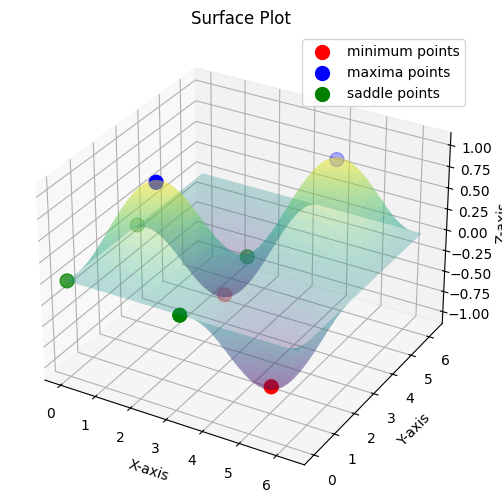

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, lambdify

plt.rcParams["figure.figsize"] = (30,6)



# Define the function for the surface
z = f  # Example function: x^2 + y^2

# Convert the SymPy expression to a callable function
func = lambdify((x, y), z, modules='numpy')

# Generate data points
x_vals = np.linspace(0, 2.0*np.pi, 100)
y_vals = np.linspace(0, 2.0*np.pi, 100)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)
z_mesh = func(x_mesh, y_mesh)

# Plotting the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha=0.3, cmap='viridis')

# get the j for minima

xmin=[]
ymin=[]
zmin=[]
for xpoint in minima:
    xmin.append( xpoint[0])
    ymin.append( xpoint[1])
    zmin.append( xpoint[2])




point_size=100
ax.scatter( xmin, ymin, zmin , color='red', s=point_size,label='minimum points')

xmax=[]
ymax=[]
zmax=[]
for xpoint in maxima:
    xmax.append( xpoint[0])
    ymax.append( xpoint[1])
    zmax.append( xpoint[2])

ax.scatter( xmax, ymax, zmax , color='blue', s=point_size,label='maxima points')

xsad=[]
ysad=[]
zsad=[]
for xpoint in saddle:
    xsad.append( xpoint[0])
    ysad.append( xpoint[1])
    zsad.append( xpoint[2])

ax.scatter( xsad, ysad, zsad , color='green', s=point_size,label='saddle points')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Surface Plot')

# Show the plot
plt.legend()
plt.show()

# Multidimensional Calculus Part 5
## Multiplicadores de Lagrange.
Dada una funcion de costo $f=f(x,y,z)$ (en dos o mas variables)
con una restriccion $g(x,y,z)=0$.

Un ejemplo clasico es el siguiente:

**Ejemplo**: Encontrar las dimensiones de una caja con maximo volumen (encontrar volumen) con area superficial de 64 cm$^2$.

La funcion de costo esta dada por el volumen $V(x,y,z)=xyz$.
La restriccion esta dada por $g(x,y,z)=2xy + 2xz + 2 yx-64$

La forma de resolver los multiplicadores de Lagrange es mediante la solucion del sistema


$$\nabla f - \lambda \nabla g = 0 \quad , \quad  g=0$$

Resolvamos el probelma en `SymPy`





In [ ]:
from sympy import symbols, ordered, Matrix
x , y ,z = symbols('x y z', positive=True, real=True) # restricciones importantes

f = x*y*z # volumen
g = 2*x*y + 2*x*z + 2*y*z - 64

lam = symbols('lambda1') # no la llame lambda, es reservada

# de la clase anterior
vf = list(ordered(f.free_symbols)) # lista de variables ordenadas de f
Df = Matrix( [f]).jacobian(vf)
Df

Matrix([[y*z, x*z, x*y]])

In [ ]:
vg = list(ordered(g.free_symbols))
Dg = Matrix( [g]).jacobian(vg)
Dg

Matrix([[2*y + 2*z, 2*x + 2*z, 2*x + 2*y]])

In [ ]:
# resolvemos el Lagrangiano
slns = solve ( (Df - lam*Dg, g))
slns

[{lambda1: sqrt(6)/3, x: 4*sqrt(6)/3, y: 4*sqrt(6)/3, z: 4*sqrt(6)/3}]

In [ ]:
from sympy import N
xs = slns[0][x]
ys = xs
zs = xs

print(f"las dimensiones de la caja son x={xs}, y={ys}, z={zs}")
s=N(xs)
print(f"las dimensiones de la caja son x={s}, y={s}, z={s}")

las dimensiones de la caja son x=4*sqrt(6)/3, y=4*sqrt(6)/3, z=4*sqrt(6)/3
las dimensiones de la caja son x=3.26598632371090, y=3.26598632371090, z=3.26598632371090


In [ ]:
# el volumen es
V = x*y*z
V

x*y*z

In [ ]:
vol = f.subs( {x:xs, y:ys, z:zs})
vol

128*sqrt(6)/9

In [ ]:
# verifiquemos que g=0
g.subs( {x:xs, y:ys, z:zs})

0

### Actividad 1.
Asuma una nave espacial de forma elipsoidal dada por la ecuacion
$4 x^2 + y^2 + 4 z^2 = 16$. Si la temperatura en la superficie de la nave esta dada por $T=8x^2 + 4 yz + 16 z + 600$ encuentre el punto, o los puntos mas calientes sobre la superficie de la nave.

## Integrales dobles.
Comencemos con un ejemplo simple


Asuma la integral

$$\int_0^1 \int_0^{1 - t^2} x dy dx = \int_0^1 (1 - x^2) x dx = \int_0^1 x dx - \int_0^1 x^3 dx = \left . \frac{x^2}{2} - \frac{x^4}{4}    \right |_0^1 = \frac12 - \frac14 = \frac14  .$$

## Integrales indefinidas

Como $\int \sin x dx = -\cos x + C$


$$\int \int \sin x dx dy = \int (-\cos x + C) dy = -\cos X + C y.$$


Miremos estas cosas en `SymPy`


In [ ]:
from sympy import integrate, symbols
x, y = symbols('x y')
f = x
I = integrate(f, (y, 0, 1-x**2), (x, 0, 1))
I

1/4

In [ ]:
integrate(f,x,y) # indefinida

x**2*y/2

Otro ejemplo

$$\int_0^1 \int_0^{1 - x^2} x \mathrm{e}^y dy dx = \left .\int_0^1 dx x \mathrm{e}^y \right |_0^{1 - x^2} =\int_0^1 x( \mathrm{e}^{1-x^2} - 1) dx = \left .-\frac12 ( \mathrm{e}^{1 - x^2}) - \frac{x^2}{2} \right |_0^1  = -\frac12 -\frac12 + \frac{\mathrm{e}}{2} = -1 + \frac{\mathrm{e}}{2}.$$

In [ ]:
import sympy as sp
f = x*sp.exp(y)
I = integrate( f, (y, 0, 1-x**2), (x, 0, 1))
I

-1 + E/2

In [ ]:
I.evalf()

0.359140914229523

In [ ]:
# otra mas, no analitica
f = sp.exp(x**2)*sp.sin(y)
I = integrate( f, (y, 0, 1 - x**2), (x, 0, 1))
I

-Integral(exp(x**2)*cos(x**2 - 1), (x, 0, 1)) - Integral(-exp(x**2), (x, 0, 1))

In [ ]:
I.simplify()

-Integral(exp(x**2)*cos(x**2 - 1), (x, 0, 1)) + sqrt(pi)*erfi(1)/2

In [ ]:
# otra que no es analitica
from sympy import pi
f = sp.exp(-y**2)
I =  integrate(f, (y, 0, sp.sin(pi*x)), (x, 0, 1))
I

sqrt(pi)*Integral(erf(sin(pi*x)), (x, 0, 1))/2

### Ejemplo. Hallar el volumen de una esfera
de radio $R$.

Segun el dibujo a mano alzada.

$$ V = 8 \int_0^R \int_0^{\sqrt{R^2 - x^2}} f(x,y) dy dx .$$
El ejercicio en `SymPy` muestra que `SymPy` tiene problemas calculando este volument

In [ ]:
# volumen de una esfera
import time
from sympy import sqrt
start = time.time()

R = symbols('R', constant = True)
f = sp.sqrt(R**2 - x**2 - y**2)
I = integrate( f, (y, 0, sp.sqrt(R**2 - x**2)), (x, 0, R))
end = time.time()

print("timing was", end - start)
I

KeyboardInterrupt: 

El tiempo de corrido en GoogleColab es de mas 20 minutos y el resultado es un monstruo de mil cabezas. No tiene sentido.

Integrar una esfera en coordenadas rectangulares es como medir un circulo con una regla.

Entonces debemos hacer un cambio de coordenadas.

Un cambio de coordenadas que funciona es el siguiente


$$ y = \sqrt{R^2 - x^2} \sin \theta$$.

$$dy = \frac{dy}{d \theta} d \theta .$$

y
$$\frac{dy}{d \theta} = \sqrt{R^2 - x^2} \cos \theta .$$

De forma queo

$$f(x,\theta) = f(x,y) \frac{dy}{d \theta} .$$

\begin{eqnarray}
f(x,\theta ) &=& \sqrt{R^2 - (R^2 - x^2) \sin^2 \theta - x^2} \sqrt{R^2 - x^2} \cos \theta \\
&=& \sqrt{R^2 - x^2 - (R^2 - x^2) \sin^2 \theta} \sqrt{R^2 - x^2} \cos \theta \\
&=& \sqrt{(R^2 - x^2) \cos^2 \theta} \sqrt{R^2 - x^2} \cos \theta \\
&=& (R^2 - x^2) \cos^2 \theta.
\end{eqnarray}
$$ 0 \le x \le R \quad 0 \le \theta \le \pi/2$$.

Hagamos esto en `SymPy`

In [ ]:
from sympy import sqrt, diff
R = symbols('R', constant=True) # radio de la esfera
theta = symbols('theta', real=True)
f = sqrt(R**2 - x**2 - y**2)
newY = sqrt(R**2 - x**2)*sp.sin(theta)


fSubs = f.subs( {y: newY})
newF = fSubs*diff(newY, theta)
newF

sqrt(R**2 - x**2)*sqrt(R**2 - x**2 - (R**2 - x**2)*sin(theta)**2)*cos(theta)

In [ ]:
from sympy import simplify, trigsimp
newF1 = trigsimp(newF)
newF1 # no se como remover las barras del segundo cos

(R**2 - x**2)*cos(theta)*Abs(cos(theta))

In [ ]:
I = 8* integrate(newF1, (theta, 0, pi/2), (x, 0, R))
I

4*pi*R**3/3